# KIT315 Tutorial-5 (Week 6) 
# Neural Networks for Image Classification

In this tutorial, we will learn how to apply neural networks to classify images. We will need:

- opencv
- tensorflow 2

## Dataset

Let's import the functions needed for the tutorial first.

In [1]:
import numpy as np
from tensorflow import keras

Load the image data.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

NOTE: If the data loading code above does not work, please load the data directly from the pickle file using the code below.

In [ ]:
# import pickle
# import gzip
# import os

# pkl_file = "./cifar10.pkl.gz"
# with gzip.open(pkl_file, "r") as f:
#     dicts = pickle.load(f)
#     x_train = dicts["x_train"]
#     y_train = dicts["y_train"]
#     x_test  = dicts["x_test"]
#     y_test  = dicts["y_test"]

Show the shape of the data.

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(np.unique(y_test))

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[0 1 2 3 4 5 6 7 8 9]


Now we can view the images. Just choose one and display it.

[8]


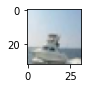

In [4]:
import matplotlib.pyplot as plt
inx =100
plt.figure(figsize = (1,1))
plt.imshow(x_train[inx,:,:,:])
print(y_train[inx])

These are images of objects in 10 categories.

- airplane : 0 
- automobile : 1 
- bird : 2 
- cat : 3 
- deer : 4 
- dog : 5 
- frog : 6 
- horse : 7 
- ship : 8 
- truck : 9

Different from MNIST handwritten digits we played with before, CIFAR images are color images. A color image can be represented as 3 channels, one for Red color, one for Green color, and one for Blue color. The size of the images is 32x32. Therefore, each image is represented by a 3-dimensional array: 32x32x3. Now, let's extract each channel and visualise it.

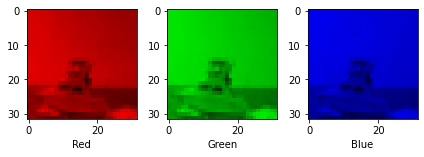

In [5]:
dim = np.zeros((32,32))

plt.subplot(1,3,1)
plt.imshow(np.stack((x_train[inx,:,:,0]/255,dim, dim), axis=2)) # axis stands for stack from which dimension 
plt.xlabel("Red")
plt.subplot(1,3,2)
plt.imshow(np.stack((dim,x_train[inx,:,:,1]/255, dim), axis=2))
plt.xlabel("Green")
plt.subplot(1,3,3)
plt.imshow(np.stack((dim, dim,x_train[inx,:,:,2]/255), axis=2))
plt.xlabel("Blue")
plt.tight_layout()

## Tensorflow-Keras

In this section, we will employ Tensorflow-Keras to build neural networks for image classification. We don't use Scikit-learn because Tensorflow is more powerful for neural networks.

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils
from tensorflow.keras.models import Sequential

First, we need to reshape the image so that we can have each image can be represented by a vector of 32*32*3 elements. We also normalise the pixel values to 0-1, by dividing the vector to 225 (the maximum value of a pixel).

In [4]:
x_train = np.reshape(x_train,(-1,32*32*3))/255.0
x_test = np.reshape(x_test,(-1,32*32*3))/255.0

To make the data work with TF, we will need to convert the label into one-hot vector. An one-hot vector is a vector with all 0s, except the position for the label value where it is 1. For example
- the label 0 (airplane) will be converted to   [1,0,0,0,0,0,0,0,0,0]
- the label 1 (automobile) will be converted to [0,1,0,0,0,0,0,0,0,0]
- the label 2 (bird) will be converted to       [0,0,1,0,0,0,0,0,0,0]
- the label 3 (cat) will be converted to        [0,0,0,1,0,0,0,0,0,0]
- the label 4 (deer) will be converted to       [0,0,0,0,1,0,0,0,0,0]
- the label 5 (dog) will be converted to        [0,0,0,0,0,1,0,0,0,0]
- the label 6 (frog) will be converted to       [0,0,0,0,0,0,1,0,0,0]
- the label 7 (horse) will be converted to      [0,0,0,0,0,0,0,1,0,0]
- the label 8 (ship) will be converted to       [0,0,0,0,0,0,0,0,1,0]
- the label 9 (truck)will be converted to       [0,0,0,0,0,0,0,0,0,1]

In [5]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(y_train)

# categories 
categories = enc.categories_[0]
print(categories)
# convert to onehot vector
y_train_onehot = enc.transform(y_train).toarray()
y_test_onehot  = enc.transform(y_test).toarray()

[0 1 2 3 4 5 6 7 8 9]


Now we initialise a model

In [9]:
model=Sequential()

and add input layer.

In [10]:
model.add(tf.keras.Input(shape=(32*32*3,)))

We will add layers to the model. The layers are called dense layers, more information about the Dense layer can be found here https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense.

There are different activation functions (we learn about linear, sigmoid, tanh, Relu in the lecture). More can be found here https://keras.io/api/layers/activations/

We will add 3 hidden layers, the first layer has 200 units, the second layer has 100 units, and the third one has 50 units.

In [11]:
model.add(layers.Dense(200,activation="relu"))
model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dense(50,activation="relu"))

Finally we add the output layer. As we are doing classification, the layer will be softmax.

In [12]:
model.add(layers.Dense(10,activation='softmax')) 

For training, we can use SGD or Adam. More can be found here https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

Please notice the learning rate (lr, or learning_rate).

In [13]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer = opt,metrics=['accuracy'])

We can review the neural network using summary() function.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 640,260
Trainable params: 640,260
Non-trainable params: 0
_________________________________________________________________


We can start the training now. Note down the values of batch_size, epochs (number of training rounds, a round of training finishes when all data samples are used for training, this process repeats). The validation_split denotes the percentage of training data used for validation. Leave suffle=True as it is.

In [15]:
train_hist = model.fit(x_train,y_train_onehot,batch_size=100,
                       epochs=30,verbose=1, validation_split=0.15,
                       shuffle=True)

Epoch 1/30
425/425 [==============================] - 3s 6ms/step - loss: 1.9498 - accuracy: 0.2828 - val_loss: 1.7924 - val_accuracy: 0.3496
Epoch 2/30
425/425 [==============================] - 2s 5ms/step - loss: 1.7298 - accuracy: 0.3772 - val_loss: 1.7197 - val_accuracy: 0.3887
Epoch 3/30
425/425 [==============================] - 2s 5ms/step - loss: 1.6547 - accuracy: 0.4042 - val_loss: 1.6579 - val_accuracy: 0.4039
Epoch 4/30
425/425 [==============================] - 2s 5ms/step - loss: 1.5901 - accuracy: 0.4295 - val_loss: 1.5756 - val_accuracy: 0.4348
Epoch 5/30
425/425 [==============================] - 2s 6ms/step - loss: 1.5487 - accuracy: 0.4411 - val_loss: 1.5816 - val_accuracy: 0.4368
Epoch 6/30
425/425 [==============================] - 2s 6ms/step - loss: 1.5177 - accuracy: 0.4559 - val_loss: 1.5358 - val_accuracy: 0.4575
Epoch 7/30
425/425 [==============================] - 3s 6ms/step - loss: 1.4847 - accuracy: 0.4651 - val_loss: 1.5644 - val_accuracy: 0.4472
Epoch 

We can visualise the training, the left plot shows the accuracy curves of the training set and the validation set. The right plot shows the loss curve (the loss is correlating to the error).

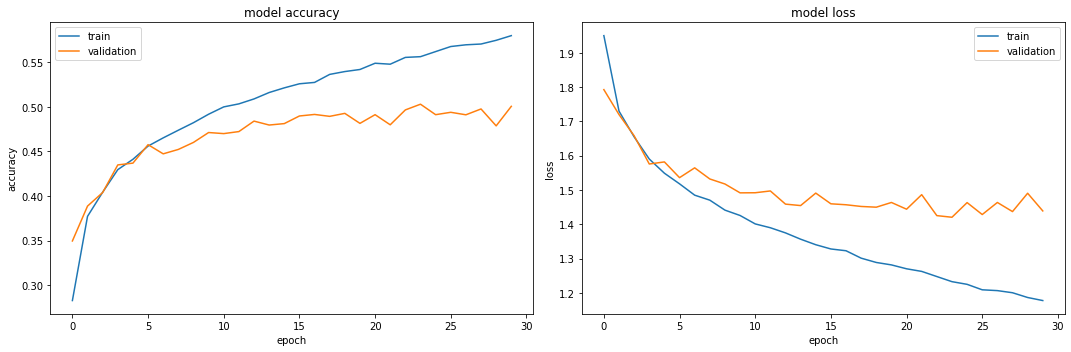

In [16]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
# Show the training accuracy 
axs[0].plot(train_hist.history['accuracy'])   # 'acc' in sklearn 0.21 / 'accuracy' in sklearn 0.24 
axs[0].plot(train_hist.history['val_accuracy']) # val_acc / val_accuracy
axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'validation'])

# Show the training loss
axs[1].plot(train_hist.history['loss'])
axs[1].plot(train_hist.history['val_loss'])
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'validation'])

plt.tight_layout()
plt.show()

Apply the trained model to the test data. Don't worry if the result is bad, your job is to tune the model to get the best result in the Excercise section.

In [17]:
loss, acc = model.evaluate(x_test,y_test_onehot, verbose=1)

print("Model's accuracy: {:5.2f}%".format(100*acc))

313/313 [==============================] - 1s 2ms/step - loss: 1.4180 - accuracy: 0.5049
Model's accuracy: 50.49%


Before doing the excercise, can you identify the the problem with the epochs=200? Can you change to make it better? Note that, if you just modify the model.fit and run the training, the model will reuse what has been learned and continue with it. To train from the beginnig, let's run the code from the initialisation step (model=Sequential()).

## E. Excercise

Apply the strategy in the last week's demonstration session, train a model which can achieve the best result. Report your best result and the settings that you used to achieve it. Explain what you have done using the box below.

In [8]:
from keras import optimizers

all_test = {}
learning_rate_list = [0.001, 0.0001]
batch_size_list = [25, 50, 100, 200]
layers_list = [4, 6, 8]
node_list = [100, 196, 156]

for lr in learning_rate_list:
    keras.backend.clear_session()
    model = Sequential()
    model.add(keras.Input(shape=(32*32*3, )))
    n_hidden_layers = 8
    for i in range(n_hidden_layers):
        model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    from keras import optimizers

    opt = keras.optimizers.Adam(lr)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    #model.summary()

    train_hist = model.fit(x_train, y_train_onehot, batch_size=100,
    epochs=20,verbose=1, validation_split=0.15, shuffle=True)

    loss, acc = model.evaluate(x_test,y_test_onehot, verbose=1)
    print("Model's accuracy: {:5.2f}%".format(100*acc))

    all_test['lr_%f' % (lr)] = train_hist.history

Epoch 1/20
665/665 [==============================] - 6s 7ms/step - loss: 1.9474 - accuracy: 0.2741 - val_loss: 1.8614 - val_accuracy: 0.3115
Epoch 2/20
665/665 [==============================] - 5s 8ms/step - loss: 1.7999 - accuracy: 0.3421 - val_loss: 1.7891 - val_accuracy: 0.3499
Epoch 3/20
665/665 [==============================] - 5s 7ms/step - loss: 1.7352 - accuracy: 0.3692 - val_loss: 1.7743 - val_accuracy: 0.3503
Epoch 4/20
665/665 [==============================] - 6s 8ms/step - loss: 1.6691 - accuracy: 0.3959 - val_loss: 1.7247 - val_accuracy: 0.3753
Epoch 5/20
665/665 [==============================] - 7s 10ms/step - loss: 1.6269 - accuracy: 0.4127 - val_loss: 1.6254 - val_accuracy: 0.4173
Epoch 6/20
665/665 [==============================] - 6s 9ms/step - loss: 1.5858 - accuracy: 0.4283 - val_loss: 1.6410 - val_accuracy: 0.4032
Epoch 7/20
665/665 [==============================] - 6s 9ms/step - loss: 1.5475 - accuracy: 0.4412 - val_loss: 1.6119 - val_accuracy: 0.4133
Epoch

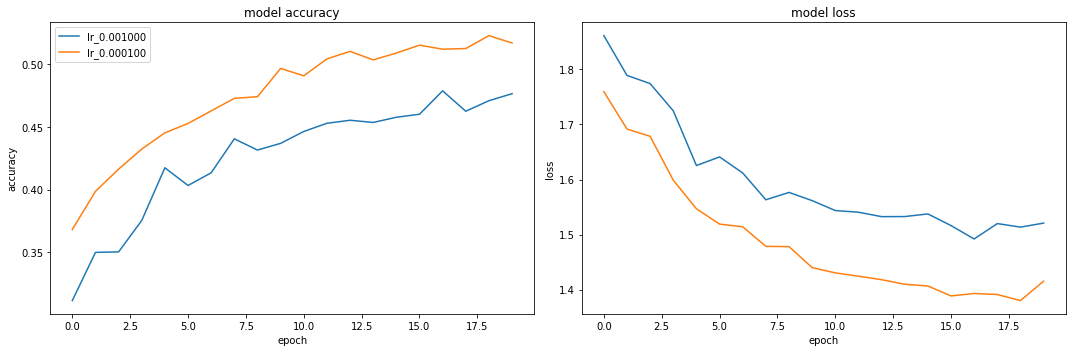

In [10]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for conf in all_test:
    axs[0].plot(all_test[conf]['val_accuracy'], label=conf)
    axs[0].set_title('model accuracy')
    axs[0].set_ylabel('accuracy')
    axs[0].set_xlabel('epoch')
    axs[0].legend()

    axs[1].plot(all_test[conf]['val_loss'])
    axs[1].set_title('model loss')
    axs[1].set_ylabel('loss')
    axs[1].set_xlabel('epoch')

plt.tight_layout()
plt.show()

batch_size: [64, 128]  similiar, but 32, 16 are not good, and much slow of course, however, the model will have a similiar val_accuracy in the end<br>
learning_rate: [0.001, 0.0001] smaller will be good <br>
layers: [6, 8, 10], 8 will be better <br>
node per layer: [100, 192, 256, 288], more will be better <br><br>
final choice: bs 128, 288_8 or 324_, 324_6, 0.0001 learning rate, 66%+ accuracy, and 53% val_accuracy can be reached in 25 epochs<br><br>

Notice that, to complex network will result overfitting due to the too many connections, but simple network couldn't reach a high accuracy

In [8]:
keras.backend.clear_session()
model = Sequential()
model.add(keras.Input(shape=(32*32*3, )))

In [9]:
from keras import optimizers

n_hidden_layers = 8
for i in range(n_hidden_layers):
    model.add(layers.Dense(288, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

opt = optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
train_hist = model.fit(x_train,y_train_onehot,batch_size=128,
                       epochs=25,verbose=1, validation_split=0.15, 
                       shuffle=True)
                       
loss, acc = model.evaluate(x_test,y_test_onehot, verbose=1)
print("Model's accuracy: {:5.2f}%".format(100*acc))

Epoch 1/25
391/391 [==============================] - 5s 12ms/step - loss: 1.9101 - accuracy: 0.2976 - val_loss: 1.7538 - val_accuracy: 0.3689
Epoch 2/25
391/391 [==============================] - 4s 11ms/step - loss: 1.6940 - accuracy: 0.3855 - val_loss: 1.6375 - val_accuracy: 0.4200
Epoch 3/25
391/391 [==============================] - 5s 12ms/step - loss: 1.6057 - accuracy: 0.4233 - val_loss: 1.5385 - val_accuracy: 0.4546
Epoch 4/25
391/391 [==============================] - 4s 11ms/step - loss: 1.5347 - accuracy: 0.4513 - val_loss: 1.5027 - val_accuracy: 0.4607
Epoch 5/25
391/391 [==============================] - 6s 14ms/step - loss: 1.4861 - accuracy: 0.4678 - val_loss: 1.4664 - val_accuracy: 0.4760
Epoch 6/25
391/391 [==============================] - 5s 13ms/step - loss: 1.4439 - accuracy: 0.4813 - val_loss: 1.5281 - val_accuracy: 0.4604
Epoch 7/25
391/391 [==============================] - 5s 14ms/step - loss: 1.4103 - accuracy: 0.4951 - val_loss: 1.4575 - val_accuracy: 0.4815

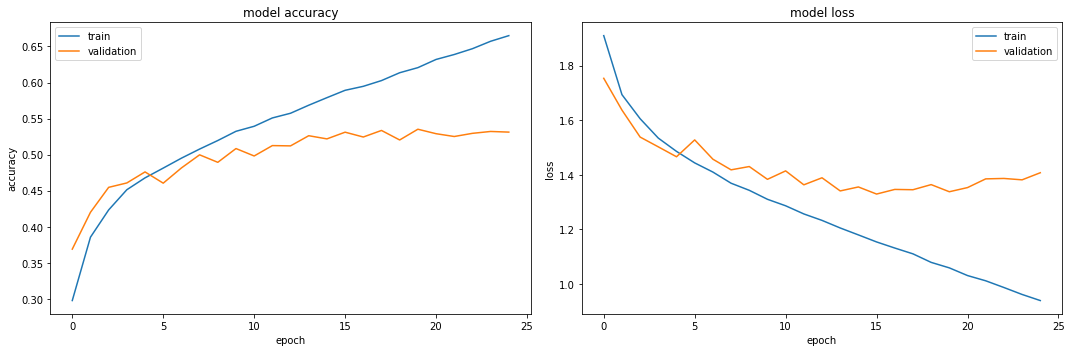

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2,figsize=(15,5))
# Show the training accuracy 
axs[0].plot(train_hist.history['accuracy']) 
axs[0].plot(train_hist.history['val_accuracy'])
axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'validation'])

axs[1].plot(train_hist.history['loss'])
axs[1].plot(train_hist.history['val_loss'])
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'validation'])

plt.tight_layout()
plt.show()

In [ ]:
alltest = {}
batch_list = [128, 64]
layer_list = [6, 8, 10]
learning_list = [0.0001, 0.0002]
node_list = [256, 288, 324]

for bs in batch_list:
  for n_layer in layer_list:
    for node in node_list:
      for lr in learning_list:
        print('train bs_%d, layer_%d, node_%d, lr_%f' % (bs, n_layer, node, lr))
        keras.backend.clear_session()
        model = Sequential()
        model.add(keras.Input(shape=(32*32*3, )))
        n_hidden_layers = n_layer
        for i in range(n_hidden_layers):
            model.add(layers.Dense(node, activation='relu'))
        model.add(layers.Dense(10, activation='softmax'))

        from keras import optimizers

        opt = keras.optimizers.Adam(lr)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

        # model.summary()

        train_hist = model.fit(x_train, y_train_onehot, batch_size=bs,
        epochs=25,verbose=1, validation_data=(x_test, y_test_onehot), shuffle=True)
        alltest['bs_%d, layer_%d, node_%d, lr_%f' % (bs, n_layer, node, lr)] = train_hist.history

In [1]:
def Average(lst):
    return sum(lst) / len(lst)

In [2]:
import pickle
a_file = open("Stored_data/nn_test.pkl", "rb")
alltest = pickle.load(a_file)
a_file.close()

In [3]:
for conf in alltest:
  print("%s: %s, %s, %s" % (conf, str(alltest[conf]['val_accuracy'][24]), str(alltest[conf]['accuracy'][24]), str(Average(alltest[conf]['val_accuracy'][15:]))))

bs_128, layer_6, node_256, lr_0.000100: 0.5349000096321106, 0.6391000151634216, 0.5275799989700317
bs_128, layer_6, node_256, lr_0.000200: 0.5364999771118164, 0.6735799908638, 0.5299899995326995
bs_128, layer_6, node_288, lr_0.000100: 0.5418000221252441, 0.6553800106048584, 0.5338599979877472
bs_128, layer_6, node_288, lr_0.000200: 0.5260999798774719, 0.7025399804115295, 0.5327499985694886
bs_128, layer_6, node_324, lr_0.000100: 0.5304999947547913, 0.6694200038909912, 0.5290299952030182
bs_128, layer_6, node_324, lr_0.000200: 0.5291000008583069, 0.7189599871635437, 0.5351400017738343
bs_128, layer_8, node_256, lr_0.000100: 0.527899980545044, 0.6418200135231018, 0.5218400061130524
bs_128, layer_8, node_256, lr_0.000200: 0.5184000134468079, 0.6776400208473206, 0.5223200023174286
bs_128, layer_8, node_288, lr_0.000100: 0.5310999751091003, 0.6579800248146057, 0.5289299964904786
bs_128, layer_8, node_288, lr_0.000200: 0.5245000123977661, 0.706820011138916, 0.5295700073242188
bs_128, layer_8

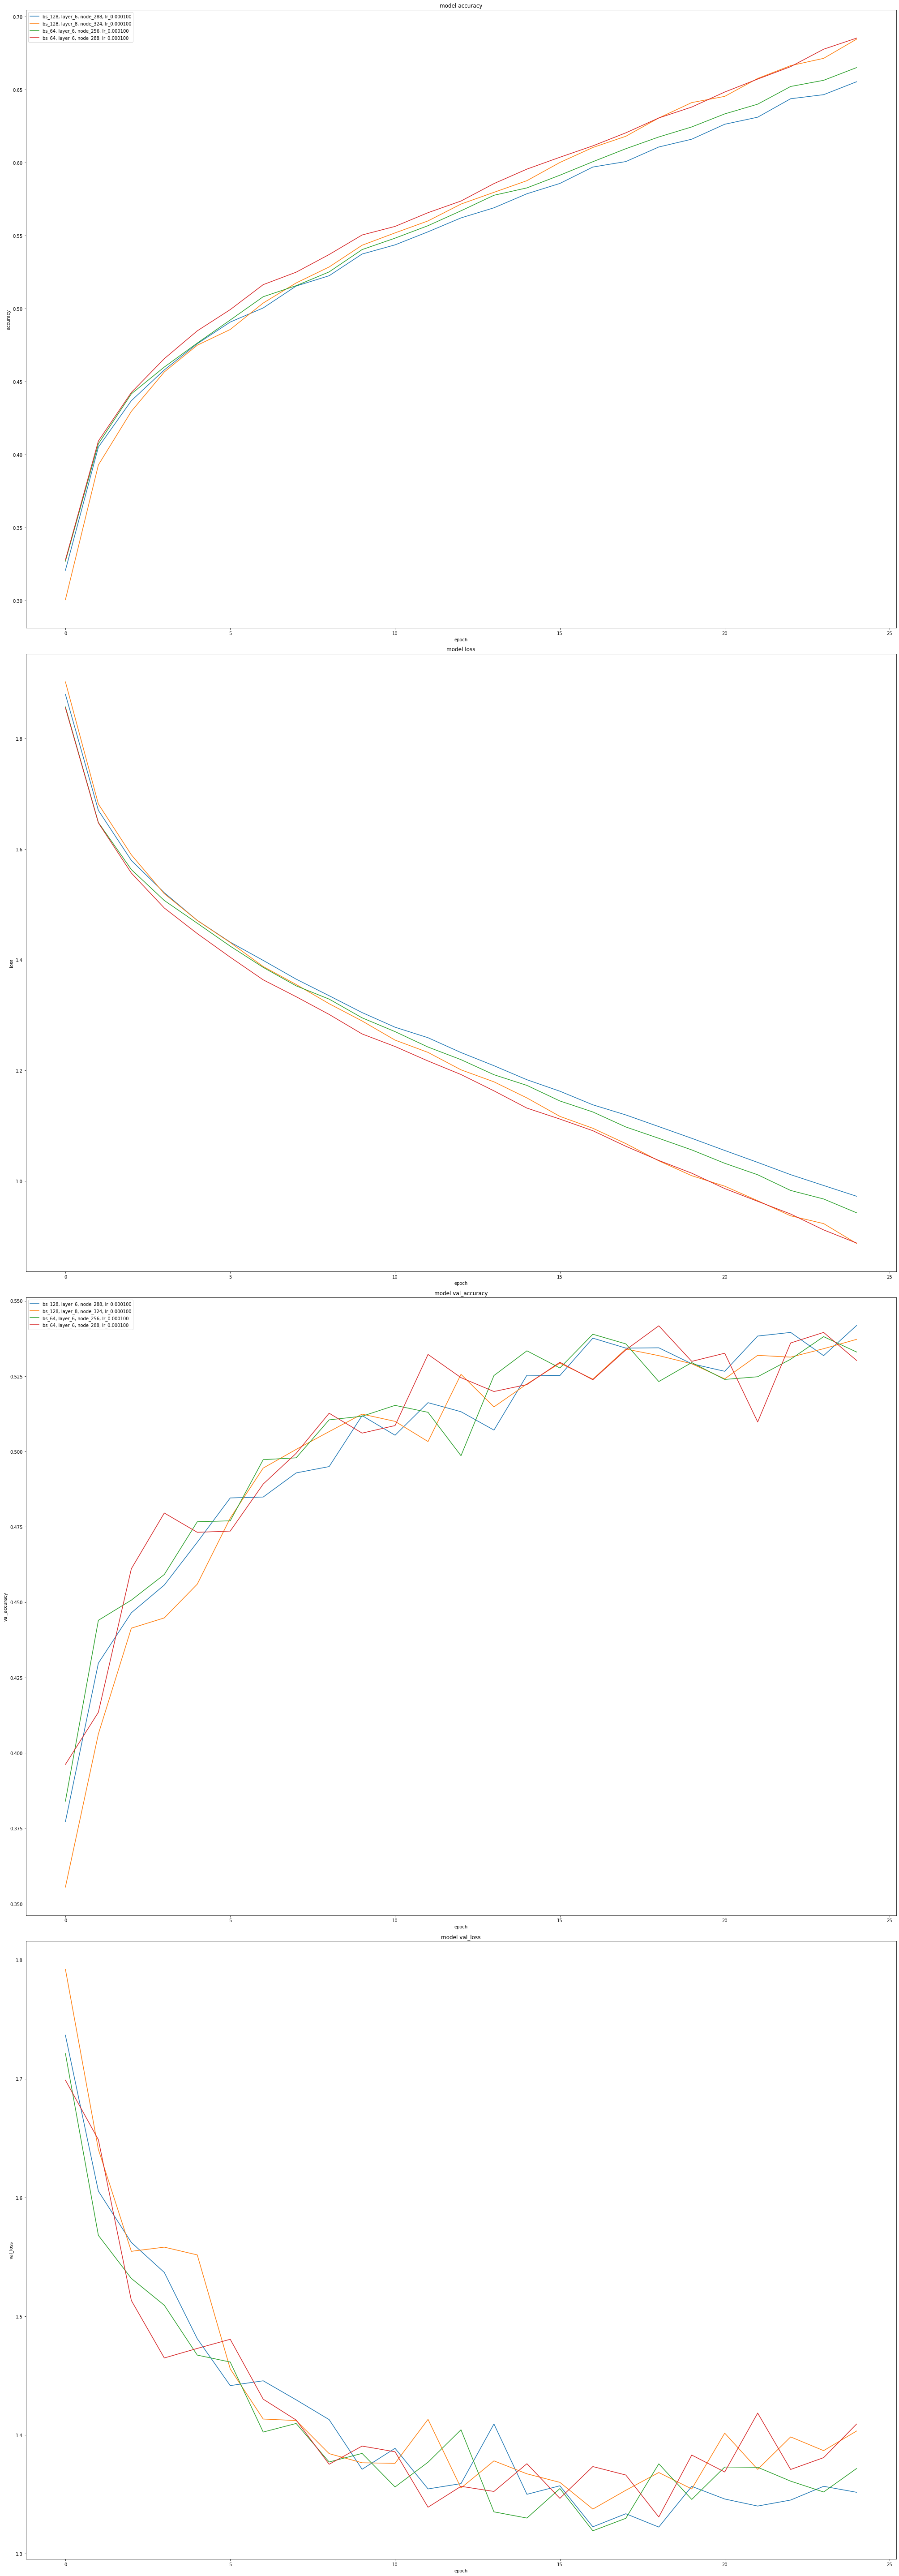

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 1, figsize=(28, 80))
for conf in alltest:
    if Average(alltest[conf]['val_accuracy'][15:]) > 0.53 and alltest[conf]['val_accuracy'][24] > 0.53 and alltest[conf]['accuracy'][24] > 0.65:
        axs[0].plot(alltest[conf]['accuracy'], label=conf)
        axs[0].set_title('model accuracy')
        axs[0].set_ylabel('accuracy')
        axs[0].set_xlabel('epoch')
        axs[0].legend()

        axs[1].plot(alltest[conf]['loss'])
        axs[1].set_title('model loss')
        axs[1].set_ylabel('loss')
        axs[1].set_xlabel('epoch')


        axs[2].plot(alltest[conf]['val_accuracy'], label=conf)
        axs[2].set_title('model val_accuracy')
        axs[2].set_ylabel('val_accuracy')
        axs[2].set_xlabel('epoch')
        axs[2].legend()

        axs[3].plot(alltest[conf]['val_loss'])
        axs[3].set_title('model val_loss')
        axs[3].set_ylabel('val_loss')
        axs[3].set_xlabel('epoch')    
plt.tight_layout()
plt.show()